In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_num = pd.read_csv('./df_num.csv')

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


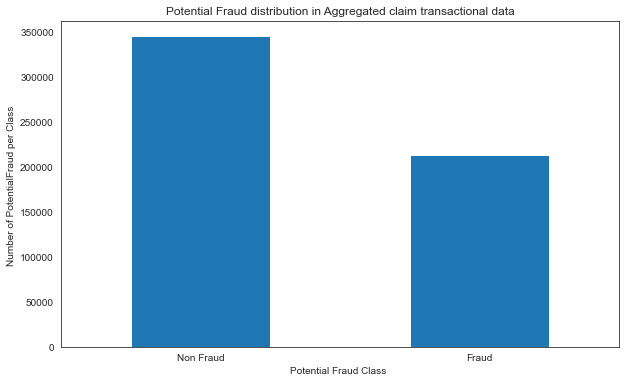

In [6]:
sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(df_num['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(df_num))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')

In [34]:
res=[]
for i in range(1000,38000,1000):
    x=df_num[(df_num['InscClaimAmtReimbursed']>=(i-1000)) & 
             (df_num['InscClaimAmtReimbursed']<=i) ]['PotentialFraud'].value_counts('yes')[0]
    res.append([i,x])

In [42]:
pd_res=pd.DataFrame(res)
pd_res.rename(columns={0:'ReimRange',
                       1:'FraudPercentage'}, inplace = True)

In [60]:
pd_res.head()

,ReimRange,FraudPercentage
0,1000,0.633447
1,2000,0.618133
2,3000,0.575078
3,4000,0.523957
4,5000,0.567446


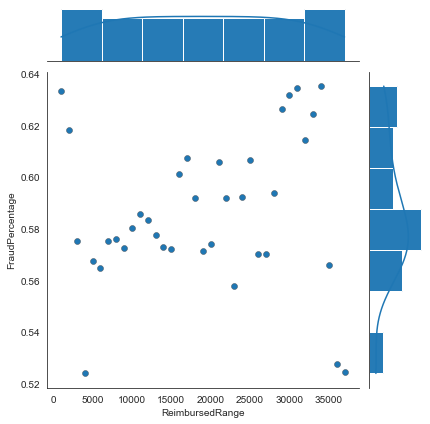

In [59]:

ax=sns.jointplot(data=pd_res,x='ReimRange',
                       y='FraudPercentage')
ax.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)
ax.plot_marginals(sns.histplot, kde=True)
ax.set_axis_labels(xlabel='ReimbursedRange',ylabel='FraudPercentage')


plt.savefig('ReimbursedRange&FraudPercentage')#FraudPercentage=Fraud/(NonFraud+Fraud)

In [68]:
pd.to_datetime(df_num.ClaimStartDt).dt.month.value_counts()

3     49634
1     49582
5     49259
4     48084
7     48048
8     47510
6     47400
10    45104
9     44900
2     44791
11    42102
12    41797
Name: ClaimStartDt, dtype: int64

In [70]:
df_num['month']=pd.to_datetime(df_num.ClaimStartDt).dt.month

In [82]:
res_month=[]
for i in range(1,13):
    p=df_num['PotentialFraud'][df_num['month']==i].value_counts('yes')[1]
    
    res_month.append([i,p])

In [83]:
res_month

[[1, 0.3842120124238635],
 [2, 0.38199638320198254],
 [3, 0.37814804367973565],
 [4, 0.3813534647699859],
 [5, 0.38378773422115753],
 [6, 0.38139240506329114],
 [7, 0.3774975024975025],
 [8, 0.3849715849294885],
 [9, 0.3821380846325167],
 [10, 0.37961156438453353],
 [11, 0.3790081231295425],
 [12, 0.37997942436060006]]

In [84]:
pd_res_month=pd.DataFrame(res_month)
pd_res_month.rename(columns={0:'Month',
                       1:'FraudPercentage'}, inplace = True)

In [85]:
pd_res_month

,Month,FraudPercentage
0,1,0.384212
1,2,0.381996
2,3,0.378148
3,4,0.381353
4,5,0.383788
5,6,0.381392
6,7,0.377498
7,8,0.384972
8,9,0.382138
9,10,0.379612


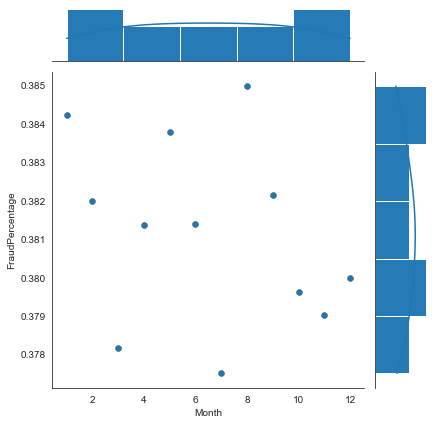

In [86]:
ax=sns.jointplot(data=pd_res_month,x='Month',
                       y='FraudPercentage')
ax.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)
ax.plot_marginals(sns.histplot, kde=True)
plt.savefig('Month&FraudPercentage')